<a href="https://colab.research.google.com/github/deepikasivan11-lgtm/ML_Boosting/blob/Regression/Retail_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload =  files.upload()

Saving retail_price.csv to retail_price.csv


In [3]:
df = pd.read_csv('retail_price.csv')

In [4]:
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [5]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [6]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [7]:
df.tail()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [10]:
df.shape

(676, 30)

In [12]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [11]:
df.isnull().sum()

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
df['product_id'] = le.fit_transform(df['product_id'])

In [15]:
df['product_category_name'] = le.fit_transform(df['product_category_name'])

In [16]:
df['month_year'] = le.fit_transform(df['month_year'])

In [17]:
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,0,0,8,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,0,0,10,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,0,0,12,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,0,0,14,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,0,0,16,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,4,0,8,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,4,0,10,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,4,0,12,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,4,0,14,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    int64  
 1   product_category_name       676 non-null    int64  
 2   month_year                  676 non-null    int64  
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [ ]:
# Model training

In [23]:
x=df.iloc[:,:-1]

In [24]:
x

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3
0,0,0,8,1,45.95,15.100000,45.950000,39,161,2,...,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000
1,0,0,10,3,137.85,12.933333,45.950000,39,161,2,...,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333
2,0,0,12,6,275.70,14.840000,45.950000,39,161,2,...,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000
3,0,0,14,4,183.80,14.287500,45.950000,39,161,2,...,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500
4,0,0,16,2,91.90,15.100000,45.950000,39,161,2,...,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,4,0,8,1,215.00,8.760000,215.000000,56,162,5,...,12600,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000
672,4,0,10,10,2090.00,21.322000,209.000000,56,162,5,...,12600,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333
673,4,0,12,59,12095.00,22.195932,205.000000,56,162,5,...,12600,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000
674,4,0,14,52,10375.00,19.412885,199.509804,56,162,5,...,12600,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500


In [21]:
y=df.iloc[:, -1]

In [22]:
y

,lag_price
0,45.900000
1,45.950000
2,45.950000
3,45.950000
4,45.950000
...,...
671,214.950000
672,215.000000
673,209.000000
674,205.000000


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)

Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
model_Lin_reg = LinearRegression()

In [27]:
model_Lin_reg.fit(x_train,y_train)

LinearRegression()

In [28]:
y_predict_lin_reg = model_Lin_reg.predict(x_test)

In [30]:
from sklearn.metrics import r2_score
r2_score_lin_reg = r2_score(y_test,y_predict_lin_reg)
r2_score_lin_reg

0.9865187198209527

Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(x_train,y_train)
y_predict_rf = model_rf.predict(x_test)
r2_score_rf = r2_score(y_test,y_predict_rf)
r2_score_rf

0.9886731161160605

LASSO

In [43]:
from sklearn.linear_model import Lasso
model_Lasso = Lasso(alpha=0.2)
model_Lasso.fit(x_train,y_train)
y_predict_lasso = model_Lasso.predict(x_test)
r2_score_lasso = r2_score(y_test,y_predict_lasso)
r2_score_lasso

0.9862387841818252

RIDGE

In [47]:
from sklearn.linear_model import Ridge
model_Ridge = Ridge(alpha=0.2)
model_Ridge.fit(x_train,y_train)
y_predict_ridge = model_Ridge.predict(x_test)
r2_score_ridge = r2_score(y_test,y_predict_ridge)
r2_score_ridge

0.9865107223696021

ELASTIC NET

In [48]:
from sklearn.linear_model import ElasticNet
model_ElasticNet = ElasticNet(alpha=0.2)
model_ElasticNet.fit(x_train,y_train)
y_predict_elastic = model_ElasticNet.predict(x_test)
r2_score_elastic = r2_score(y_test,y_predict_elastic)
r2_score_elastic

0.9862239540070911

XG Booster

In [50]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(x_train,y_train)
y_predict_XG = model_xgb.predict(x_test)
r2_score_XG = r2_score(y_test,y_predict_XG)
r2_score_XG

0.9852521038128313

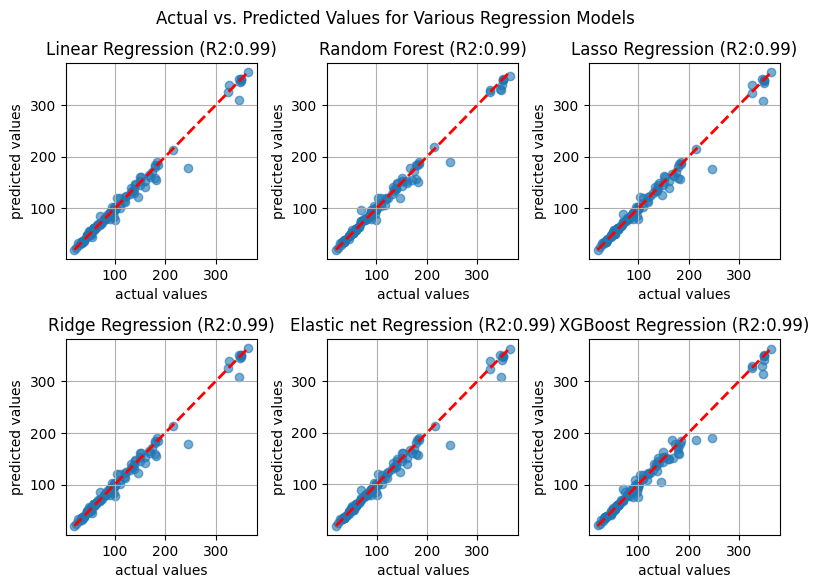

In [51]:
models = {
    "Linear Regression": (y_predict_lin_reg, r2_score_lin_reg),
    "Random Forest": (y_predict_rf, r2_score_rf),
     "Lasso Regression": (y_predict_lasso, r2_score_lasso),
     "Ridge Regression": (y_predict_ridge, r2_score_ridge),
     "Elastic net Regression": (y_predict_elastic, r2_score_elastic),
     "XGBoost Regression": (y_predict_XG, r2_score_XG)
}

fig,axes = plt.subplots(3,3,figsize=(8,8))
axes = axes.flatten()
idx=0
for name,(predictions,r2) in models.items():
  ax = axes[idx]
  ax.scatter(y_test,predictions,alpha=0.6)
  min_val = min(y_test.min(),predictions.min())
  max_val = max(y_test.max(),predictions.max())
  ax.plot([min_val,max_val],[min_val,max_val], 'r--',lw=2)
  ax.set_title(f'{name} (R2:{r2:.2f})')
  ax.set_xlabel('actual values')
  ax.set_ylabel('predicted values')
  ax.grid(True)
  idx  += 1

for i in range(idx, len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Actual vs. Predicted Values for Various Regression Models', y=1.02, fontsize=12)
plt.show()